<a href="https://colab.research.google.com/github/techsidh/Amazon-reviews-sentiment-analysis/blob/main/Amazon_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP libraries

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

#Modeling libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

n this way, the following attributes are available in the data:

1. Id (numerical): start and end date of the attack in timestamp format.
2. ProductId (categorical): ID of the referenced product by the customer.
3. UserId (categorical): registered user ID.
4. ProfileName (text): registered user profile name.
5. HelpfulnessNumerator (numerical): number of users who found the review helpful.
6. HelpfulnessDenominator (numerical): Number of users who voted whether the review was helpful or not.
7. Score (ordinal): rating between 1 and 5.
8. Time (numerical): timestamp of the review.
9. Summary (text): brief summary of the review.
10. Text (text): text of the review.

In [21]:
amazon_reviews = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
amazon_reviews.shape

(10000, 9)

In [22]:
amazon_reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
amazon_reviews.tail()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
9995,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...
9996,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
9997,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...
9998,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...
9999,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [24]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductId               10000 non-null  object
 1   UserId                  10000 non-null  object
 2   ProfileName             10000 non-null  object
 3   HelpfulnessNumerator    10000 non-null  int64 
 4   HelpfulnessDenominator  10000 non-null  int64 
 5   Score                   10000 non-null  int64 
 6   Time                    10000 non-null  int64 
 7   Summary                 10000 non-null  object
 8   Text                    10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [25]:
amazon_reviews.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,1.573500,2.014900,4.134500,1.294359e+09
std,5.230634,5.807551,1.327172,4.769699e+07
min,0.000000,0.000000,1.000000,9.617184e+08
25%,0.000000,0.000000,4.000000,1.268762e+09
50%,0.000000,1.000000,5.000000,1.307837e+09
75%,2.000000,2.000000,5.000000,1.329955e+09
max,187.000000,216.000000,5.000000,1.351210e+09


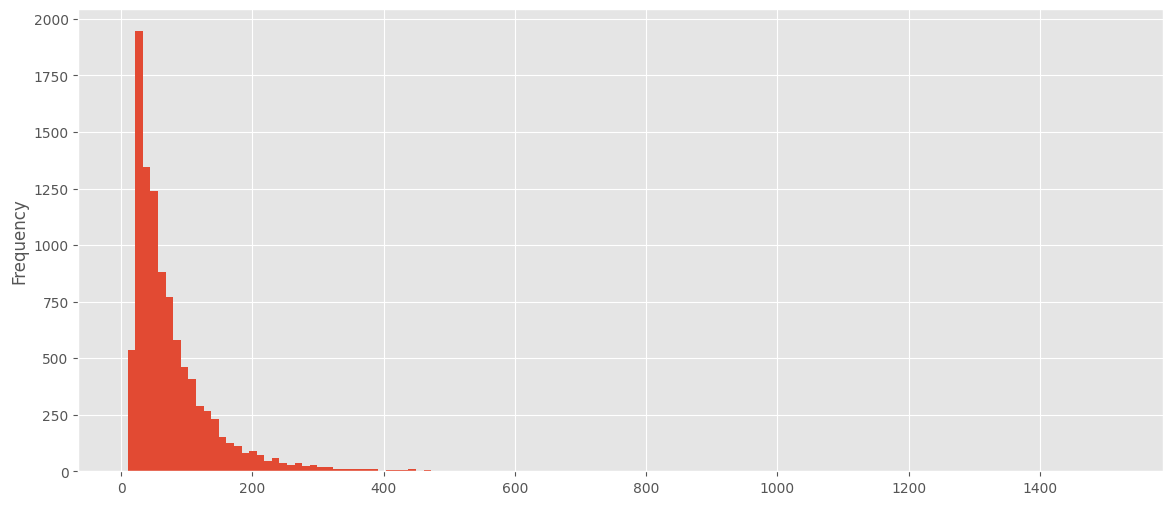

In [26]:
word_per_review = amazon_reviews.Text.apply(lambda x:len(x.split(" "))).plot(kind ='hist',bins = 130)

In [27]:
# print("Average Words:", word_per_review.mean())
# print("Skewness Words:", word_per_review.skew())

## Check distibution of rating


In [28]:
percent_val = 100*amazon_reviews['Score'].value_counts(normalize = True)
percent_val

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

<Axes: ylabel='Score'>

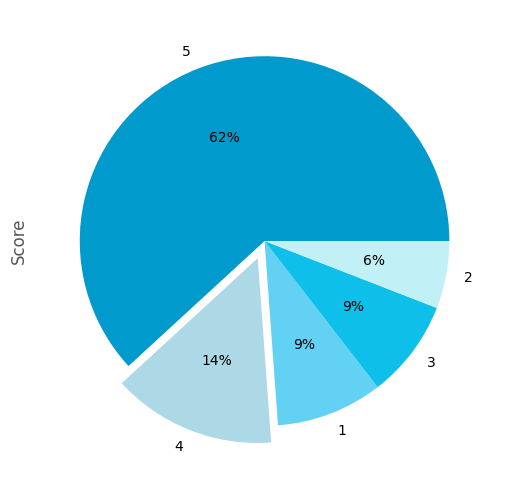

In [29]:

color = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9','#C1F0F6', '#0099CC']
percent_val.plot(kind = 'pie',autopct='%.0f%%',explode = [0, 0.1, 0 , 0, 0],colors = color)


## Check users who found the review helpful

<Axes: ylabel='Frequency'>

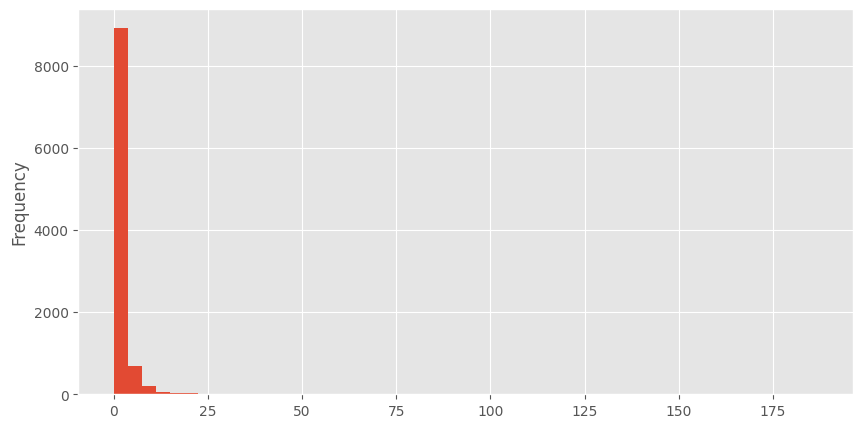

In [30]:
plt.figure(figsize = (10,5))
amazon_reviews['HelpfulnessNumerator'].plot(kind = 'hist',bins = 50)

<Axes: ylabel='Frequency'>

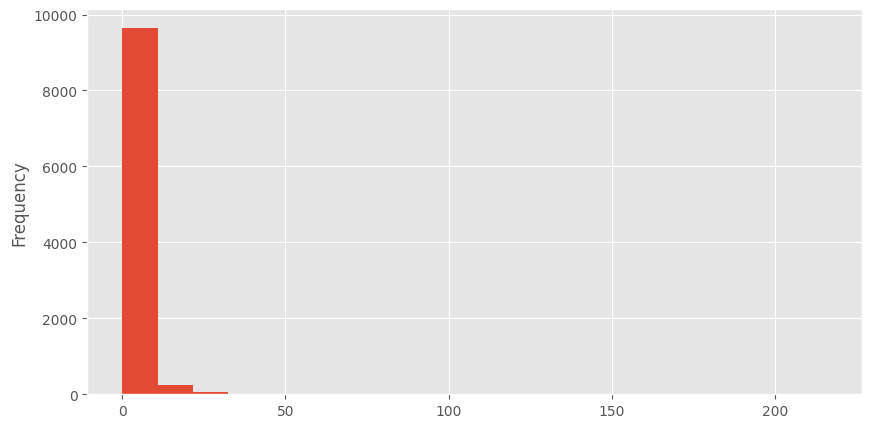

In [31]:
plt.figure(figsize = (10,5))
amazon_reviews['HelpfulnessDenominator'].plot(kind = 'hist',bins = 20)


In [32]:
word_cloud_summary = " ".join(amazon_reviews['Summary'])


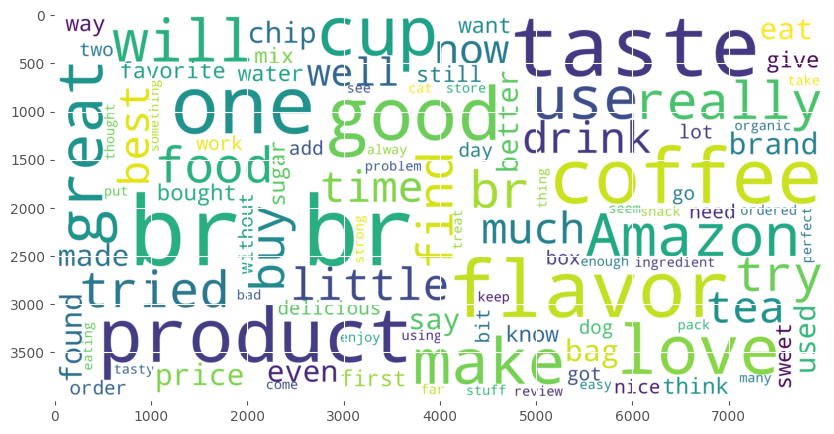

In [33]:
word_summary = WordCloud(max_font_size = 100,
                         max_words = 100,
                         background_color='white',
                         scale = 10,
                         width = 800,
                         height = 400).generate(word_cloud_summary)

plt.figure(figsize = (10,5))
plt.imshow(word_cloud,
           interpolation = 'bilinear')

In [34]:
word_cloud_text = "".join(amazon_reviews['Text'])


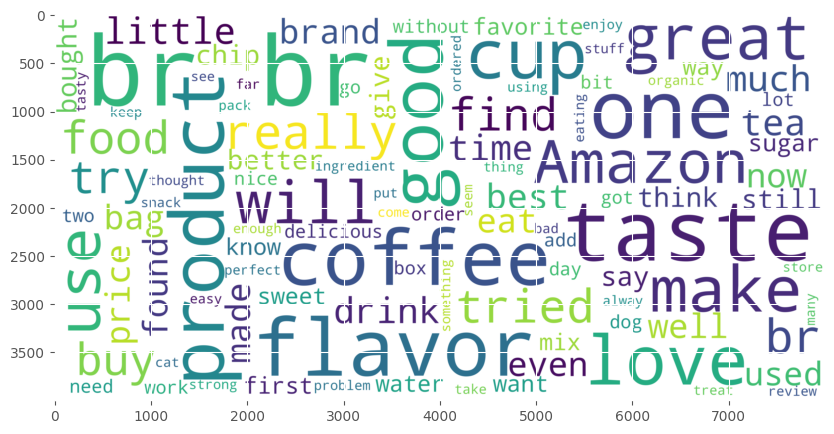

In [35]:
word_cloud = WordCloud(max_font_size = 100,
                       max_words = 100,
                       background_color = "white",
                       scale = 10,
                       width = 800,
                       height = 400).generate(word_cloud_text)

plt.figure(figsize = (10,5))
plt.imshow(word_cloud,
           interpolation = 'bilinear')
